<a href="https://colab.research.google.com/github/malinphy/MNIST_digits/blob/main/MNIST_DIGITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

from sklearn.preprocessing import LabelBinarizer
from keras.models import model_from_json 

In [2]:
(X_train,y_train),(X_test,y_test) =  tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [4]:
LB = LabelBinarizer()
binarized_test = LB.fit_transform(y_test)
binarized_train = LB.fit_transform(y_train)

In [5]:
X_train.shape, X_test.shape, binarized_test.shape, binarized_train.shape

((60000, 28, 28), (10000, 28, 28), (10000, 10), (60000, 10))

In [6]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

(5.0, <matplotlib.image.AxesImage at 0x7fe2baff0358>)

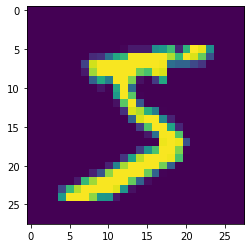

In [7]:
y_train[0],plt.imshow(X_train[0,:,:])

In [8]:
np.max(X_test), np.min(X_test), np.min(X_train),np.max(X_train)

(255.0, 0.0, 0.0, 255.0)

In [9]:
np.unique(y_train)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [10]:
tf_model = Sequential()
tf_model.add(Flatten(input_shape = (28,28)))
tf_model.add(Dense(128,activation = 'relu'))
tf_model.add(Dense(10,activation = 'sigmoid'))

In [11]:
tf_model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']


)

In [12]:
res = tf_model.fit(X_train,binarized_train,epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4272 - accuracy: 0.8870
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0558 - accuracy: 0.9337
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0406 - accuracy: 0.9442
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0359 - accuracy: 0.9513
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0328 - accuracy: 0.9563
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0308 - accuracy: 0.9585
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0288 - accuracy: 0.9611
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0265 - accuracy: 0.9634
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0258 - accuracy: 0.9644
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.025

In [13]:
model_acc = res.history['accuracy']
model_loss  = res.history['loss']

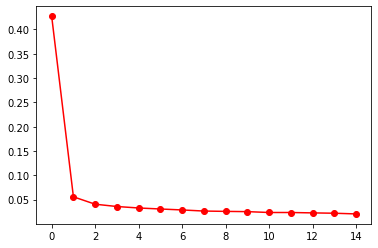

In [14]:
plt.plot(model_loss,'-or')

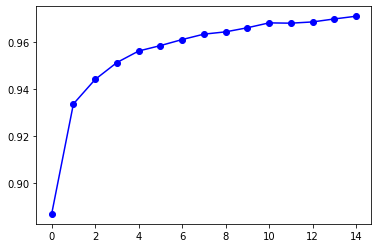

In [15]:
plt.plot(model_acc,'-ob')

In [16]:
binarized_pred = tf_model.predict(X_test)

In [17]:
y_pred = np.argmax(binarized_pred , axis =1 )

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [19]:
CM = confusion_matrix(y_test,y_pred)
CM

array([[ 954,    1,    2,    3,    0,    5,    2,    3,   10,    0],
       [   0, 1119,    2,    2,    0,    1,    2,    0,    9,    0],
       [   1,    0,  974,    6,    0,    0,    2,   10,   37,    2],
       [   1,    0,    7,  959,    1,   20,    0,    2,   18,    2],
       [   1,    0,    2,    0,  950,    0,    4,    2,    5,   18],
       [   2,    2,    1,   16,    2,  844,    8,    2,   13,    2],
       [   6,    3,    2,    0,    6,   11,  919,    0,   11,    0],
       [   0,    5,    5,    6,    8,    0,    0,  977,   11,   16],
       [   6,    0,    1,    4,    5,    8,    2,    5,  941,    2],
       [   2,    6,    1,   10,   19,   10,    0,   13,   24,  924]])

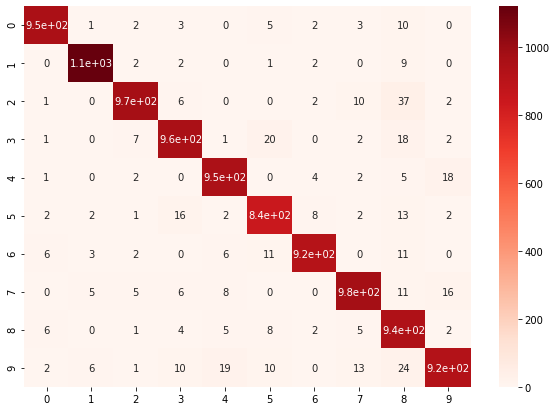

In [20]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix (y_test,y_pred), annot = True, cmap=plt.cm.Reds )

In [25]:
# serialize model to JSON
model_json = tf_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
tf_model.save_weights("tf_model.h5")
# print("Saved model to disk")


In [26]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("tf_model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
